<a href="https://colab.research.google.com/github/Jhonier-Jimenez/bankruptcy-prediction-model/blob/main/01%20-%20exploraci%C3%B3n%20de%20datos%20y%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
url = 'https://raw.githubusercontent.com/HernanAC/TaiwaneseBankruptcyPrediction/main/data.csv'
data = pd.read_csv(url)

# **Cargando el dataset**

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.shape

(6819, 96)

In [ ]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# **Exploración de datos**



In [ ]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

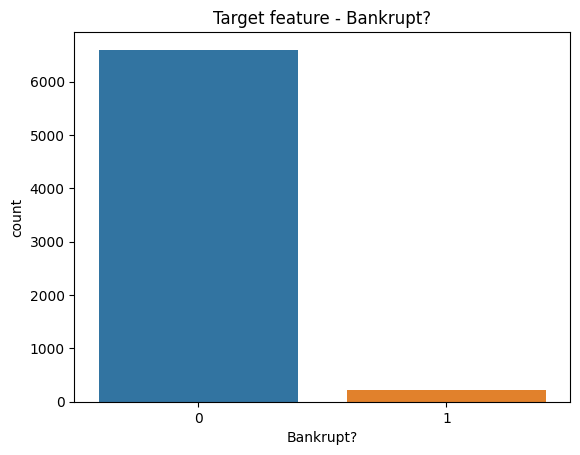

In [ ]:
sns.countplot(x=data['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

<Axes: xlabel='Bankrupt?', ylabel='count'>

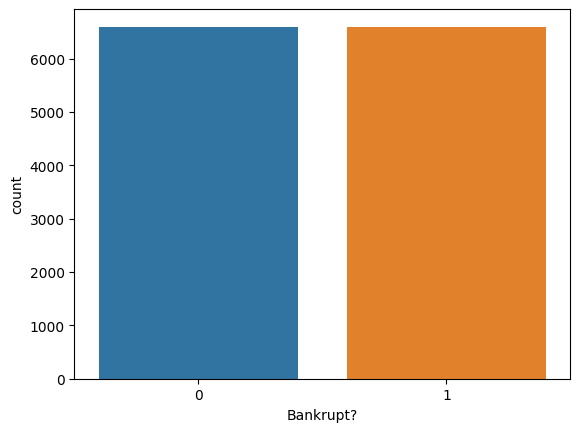

In [ ]:
X=data.drop(labels=['Bankrupt?'], axis=1)
y=data['Bankrupt?']
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)
sns.countplot(x=y)

In [ ]:
feature_selection=SelectKBest(f_classif,k=30).fit(X,y)
selected_features=X.columns[feature_selection.get_support()]

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.score(X_test,y_test)

0.9093434343434343

In [ ]:
y_pred=log_reg.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9093434343434343

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1969
           1       0.91      0.91      0.91      1991

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [ ]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9585858585858585

In [ ]:
svc_predict=model.predict(X_test)

In [ ]:
data_copy = data.copy()

In [ ]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
columns_to_modify = [data.columns[1], data.columns[2], data.columns[9], 
                     ' Inventory Turnover Rate (times)', 
                     ' Working Capital/Equity', 
                     ' Contingent liabilities/Net worth']
columns_to_modify

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' Non-industry income and expenditure/revenue',
 ' Inventory Turnover Rate (times)',
 ' Working Capital/Equity',
 ' Contingent liabilities/Net worth']

In [ ]:
def modify_column(data, column_name):
    if column_name not in data.columns:
        print(f"{column_name} is not a valid column name.")
        return data
    else:
        col_idx = data.columns.get_loc(column_name)
        for i in range(len(data)):
            if data.iloc[i, col_idx] < 0.33:
                data.iloc[i, col_idx] = "LOW"
            elif data.iloc[i, col_idx] < 0.66:
                data.iloc[i, col_idx] = "MEDIUM"
            else:
                data.iloc[i, col_idx] = "HIGH"
        return data

In [ ]:
for column_name in columns_to_modify:
  modify_column(data_copy, column_name)
data_copy

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,MEDIUM,MEDIUM,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,LOW,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,MEDIUM,MEDIUM,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,LOW,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,MEDIUM,MEDIUM,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,LOW,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,MEDIUM,MEDIUM,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,LOW,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,MEDIUM,MEDIUM,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,LOW,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,MEDIUM,MEDIUM,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,LOW,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,MEDIUM,MEDIUM,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,LOW,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,MEDIUM,MEDIUM,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,LOW,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,MEDIUM,MEDIUM,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,LOW,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
